In [8]:
from LIMxCMBL.cross_spectrum import *
from LIMxCMBL.init import *
from LIMxCMBL.kernels import get_f_Kkappa, get_f_KI, get_f_KILo, apply_window

In [9]:
# CCAT-Prime
zmin = 3.5
zmax = 8.1

Omega_field = 8 #deg^2

chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

Pei = 5.7e4 #Jy / sr CCAT-prime

Lambdas = np.logspace(-5, 0, 50)

In [10]:
chis_resample_len = int(np.log2(len(chis_resample)))


In [11]:
ref_IHi_kappa_fname = '/scratch/users/delon/LIMxCMBL/IHiKappa/zmin_%.5f_zmax_%.5f_Lambda_%.5f_chi_sample_2e%d.npy'%(zmin, zmax, Lambdas[0],chis_resample_len)
ref_IHi_kappa = np.load(ref_IHi_kappa_fname)
vb = np.max(np.abs(ref_IHi_kappa))

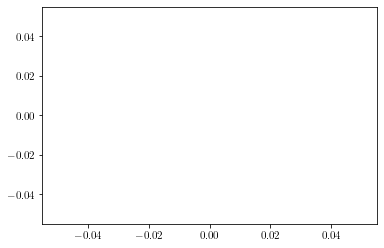

In [12]:
plt.plot()
plt.rcParams.update({
    "text.usetex": True,
    "font.size": "11"
})

In [13]:
Lambdas[0],Lambdas[10],Lambdas[20], Lambdas[30], Lambdas[-1]

(1e-05,
 0.00010481131341546853,
 0.0010985411419875584,
 0.011513953993264481,
 1.0)

/tmp/ipykernel_11586/811638696.py:31: UserWarning: Casting input data from float128 to float64 for imshow.
  plt.savefig('figures/002.011.IHikappa-CCAT-prime-Lambda-%.1e.pdf'%(Lambda), bbox_inches = 'tight')


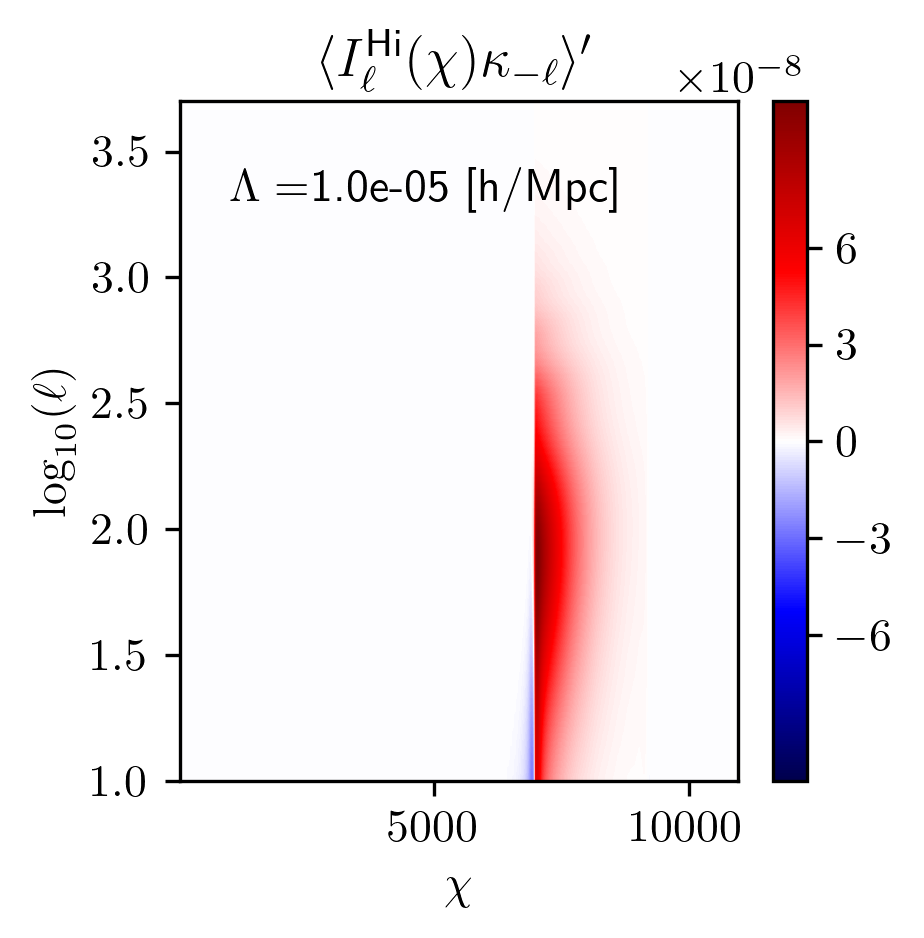

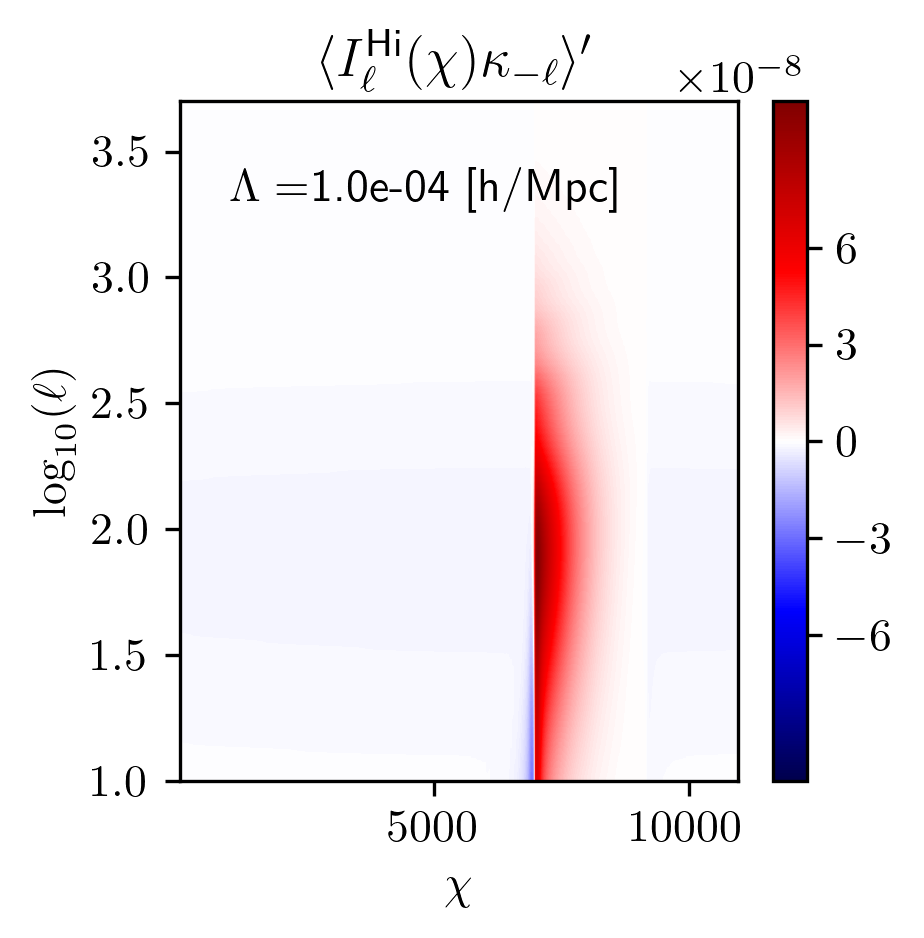

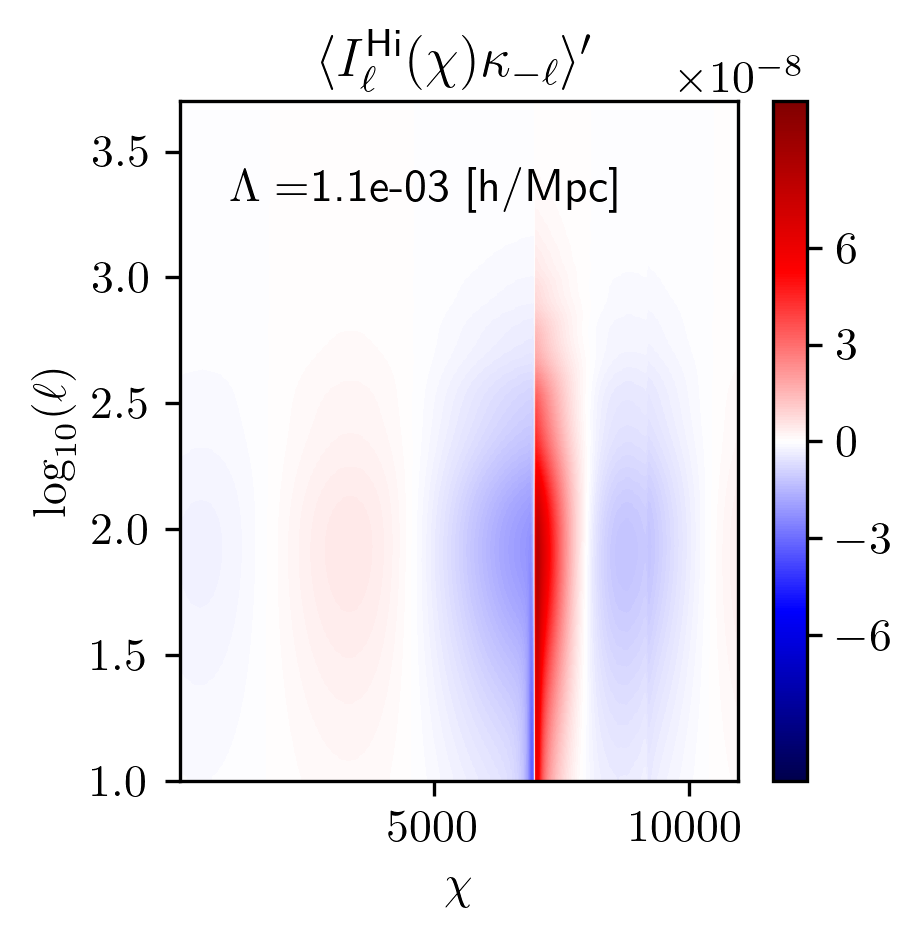

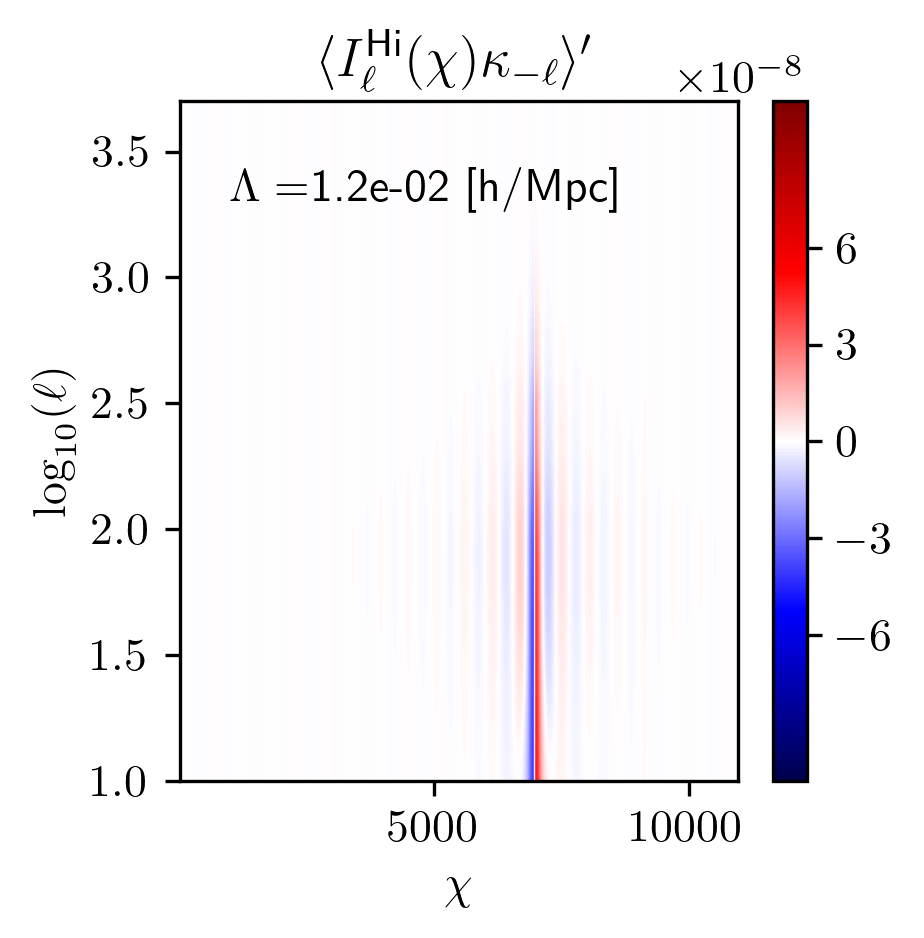

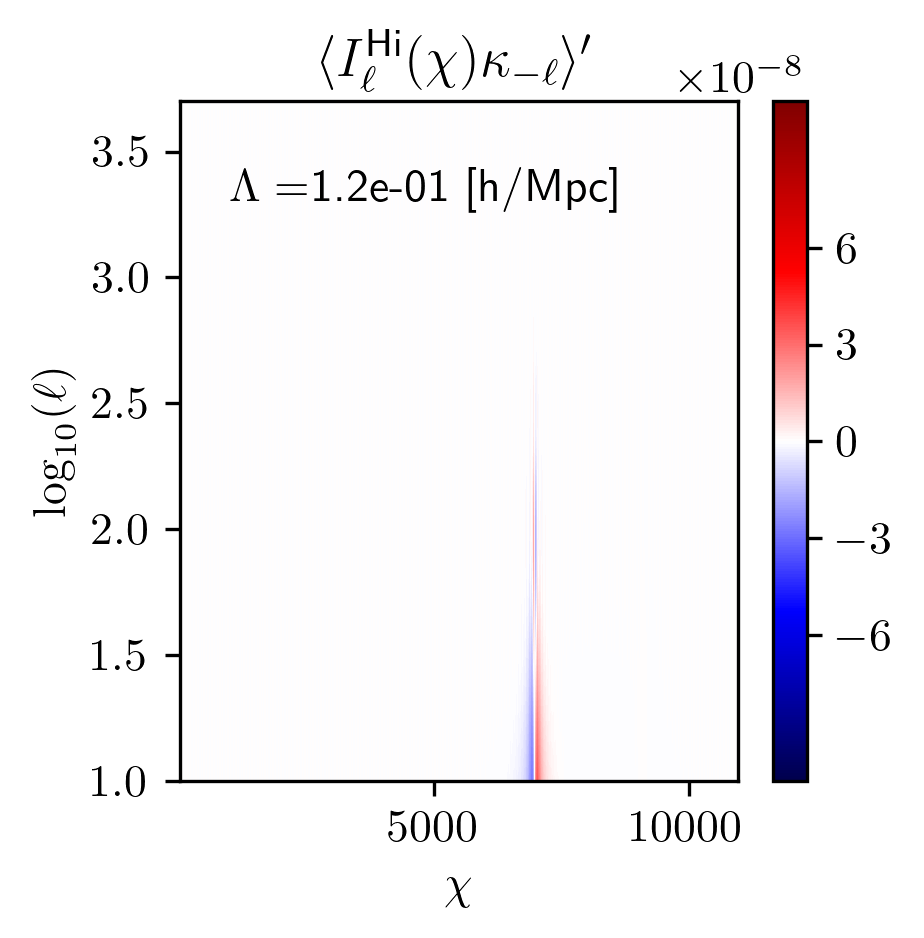

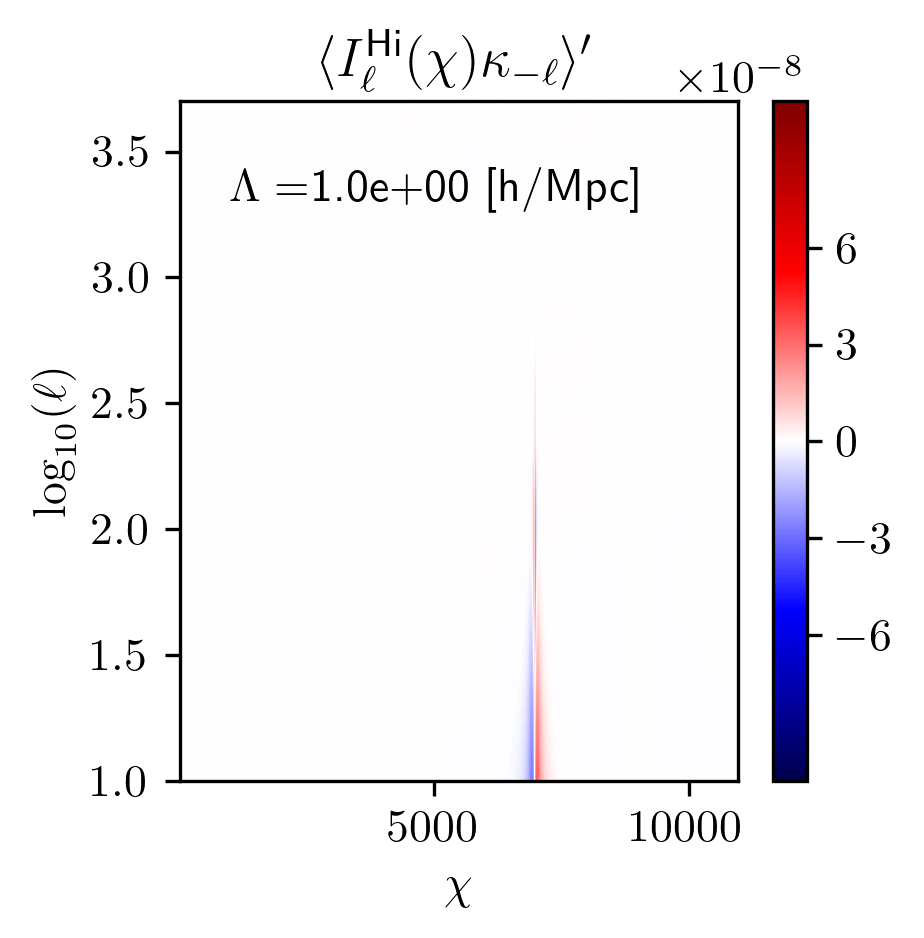

In [14]:
for Lambda in [Lambdas[0],Lambdas[10],Lambdas[20], Lambdas[30], Lambdas[40], Lambdas[-1]]:
    IHi_kappa_fname = '/scratch/users/delon/LIMxCMBL/IHiKappa/zmin_%.5f_zmax_%.5f_Lambda_%.5f_chi_sample_2e%d.npy'%(zmin, zmax, Lambda,chis_resample_len)
    IHi_kappa = np.load(IHi_kappa_fname)
    vminmax = np.max(np.abs(IHi_kappa))
    vminmax = vb
    plt.figure(figsize=(3,3), dpi=300, facecolor='w',)


    log_ymin = np.log10(ells[0])
    log_ymax = np.log10(ells[-1])

    # plot data
    im = plt.imshow(IHi_kappa, 
               origin='lower',
              cmap = 'seismic',
              vmin = -vminmax,
              vmax =  vminmax,
               aspect = 'auto',
              extent=[chibs[0], chibs[-1], log_ymin, log_ymax])

    cbar = plt.colorbar(im, ticks=[-6e-8, -3e-8,0,3e-8,6e-8])
#     cbar.ax.set_ylabel('Linear Scale')


    # set bounds
    plt.title(r"$\langle I_{ \ell}^{\sf Hi}(\chi) \kappa_{- \ell}\rangle'$")
    plt.text(1000, 3.3, '$\Lambda =$%.1e [h/Mpc]'%(Lambda))
    plt.xlabel(r'$\chi$')
    plt.ylabel(r"$\log_{10}(\ell)$")

    plt.savefig('figures/002.011.IHikappa-CCAT-prime-Lambda-%.1e.pdf'%(Lambda), bbox_inches = 'tight')